In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv ('/im/Video_Games_Sales_as_at_22_Dec_2016.csv')

Библиотека Pandas

In [4]:
df.dropna()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Построим график продаж видео игр в различных странах в зависимости от года.

In [5]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [6]:
df1 = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]\
    .groupby('Year_of_Release').sum()
df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36


<AxesSubplot:xlabel='Year_of_Release'>

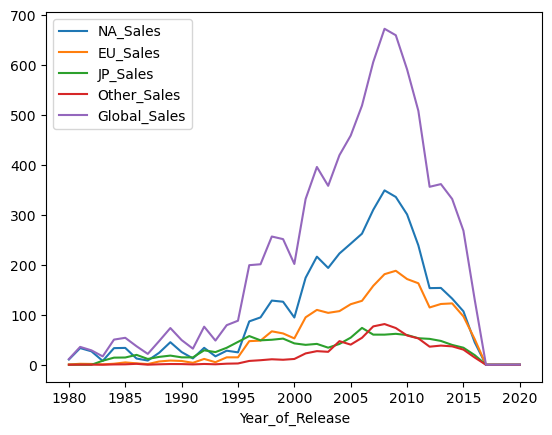

In [7]:
df1.plot()

<AxesSubplot:xlabel='Year_of_Release'>

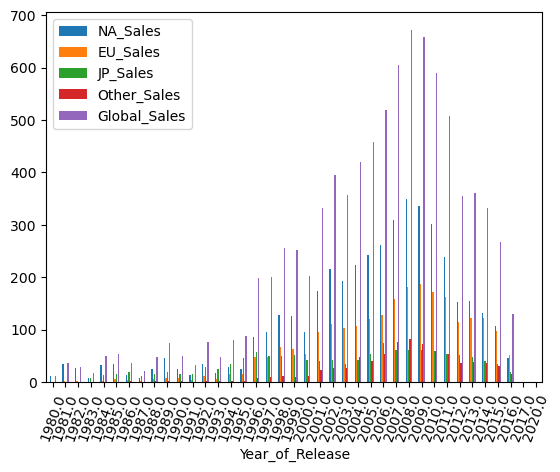

In [27]:
df1.plot(kind='bar', rot=70)

Text(0, 0.5, 'games')

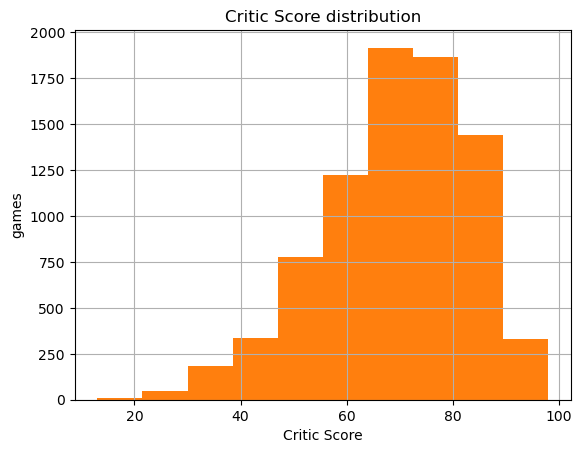

In [9]:
df.Critic_Score.hist()
ax = df.Critic_Score.hist()
ax.set_title('Critic Score distribution')
ax.set_xlabel('Critic Score')
ax.set_ylabel('games')


In [10]:
top_developers_df=df.groupby('Developer')[['Global_Sales']].sum().sort_values('Global_Sales', ascending=False).head(10)
top_developers_df

,Global_Sales
Developer,
Nintendo,531.71
EA Sports,175.38
EA Canada,142.32
Ubisoft,132.54
Rockstar North,119.47
Capcom,115.71
Ubisoft Montreal,108.31
Treyarch,103.16
EA Tiburon,96.12


In [31]:
top_developers_df.style.bar()

,Global_Sales
Developer,
Nintendo,531.710000
EA Sports,175.380000
EA Canada,142.320000
Ubisoft,132.540000
Rockstar North,119.470000
Capcom,115.710000
Ubisoft Montreal,108.310000
Treyarch,103.160000
EA Tiburon,96.120000


                                        
                                        
                                        
                                        Библиотека Seaborn
                                        
                                        
                                        

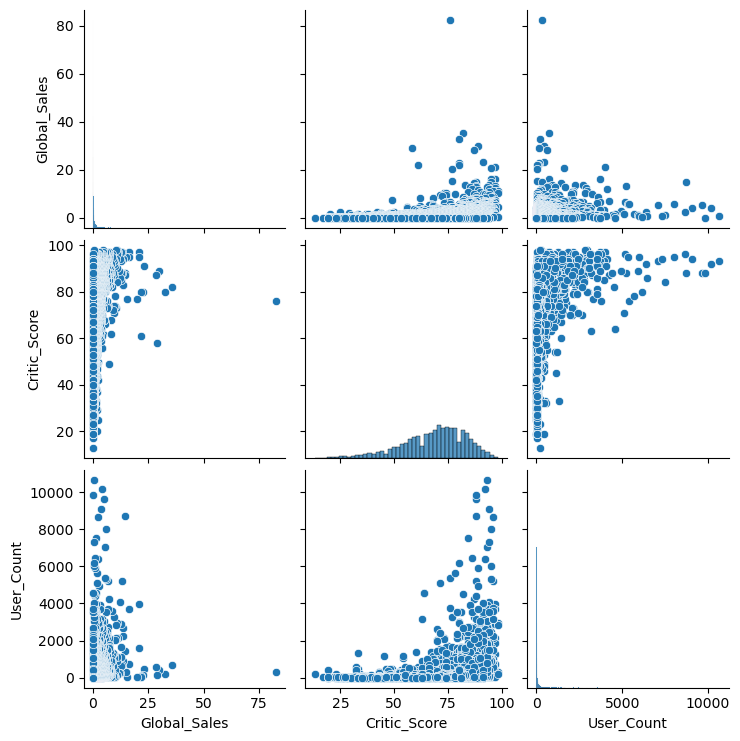

In [21]:
sns_plot = sns.pairplot(
df[['Global_Sales', 'Critic_Score', 'User_Count']]
   )
sns_plot

D:\Anakonda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

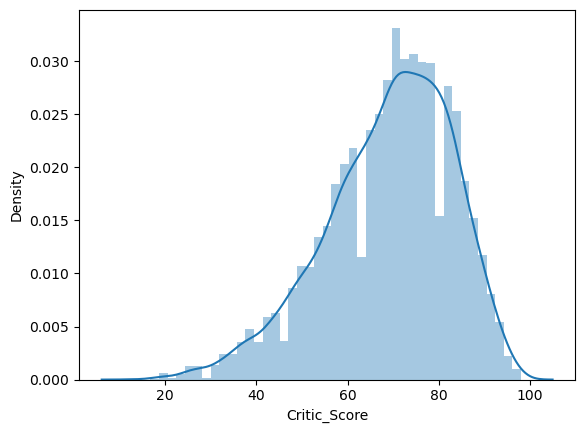

In [35]:
sns.distplot(df.Critic_Score)

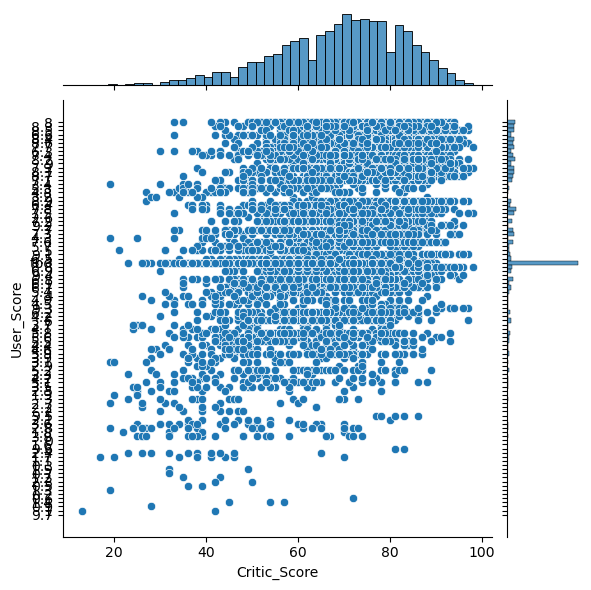

In [37]:
sns.jointplot(x= 'Critic_Score', y= 'User_Score', data=df, kind= 'scatter')

In [38]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
top_platforms

array(['PS2', 'DS', 'PS3', 'Wii', 'X360'], dtype=object)

<AxesSubplot:xlabel='Platform', ylabel='Critic_Score'>

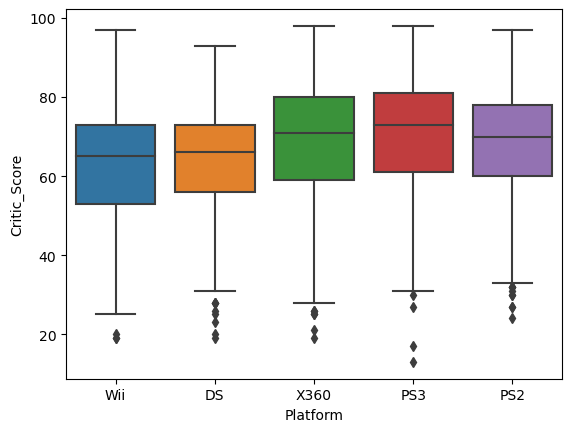

In [39]:
sns.boxplot(x='Platform', y='Critic_Score', data=df[df.Platform.isin(top_platforms)])

In [40]:
platform_genre_sales = df.pivot_table(index='Platform',
                                     columns='Genre',
                                     values='Global_Sales',
                                     aggfunc=sum).fillna(0).applymap(float)
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.34,1.70,1.24,3.58,13.27,14.68,2.91,0.00,26.48,0.45,3.43,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,58.33,4.90,10.57,10.98,32.52,5.55,14.94,84.29,1.29,27.43,6.19,2.10
DC,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GB,7.92,17.16,0.00,13.35,54.91,47.47,4.55,88.24,1.20,3.55,9.05,8.05
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
GC,37.84,5.93,18.43,16.73,28.66,4.70,21.89,13.15,13.63,8.59,25.49,4.32
GEN,2.74,0.19,5.90,0.03,15.45,0.00,0.26,0.27,0.13,0.00,3.20,0.19


<AxesSubplot:xlabel='Genre', ylabel='Platform'>

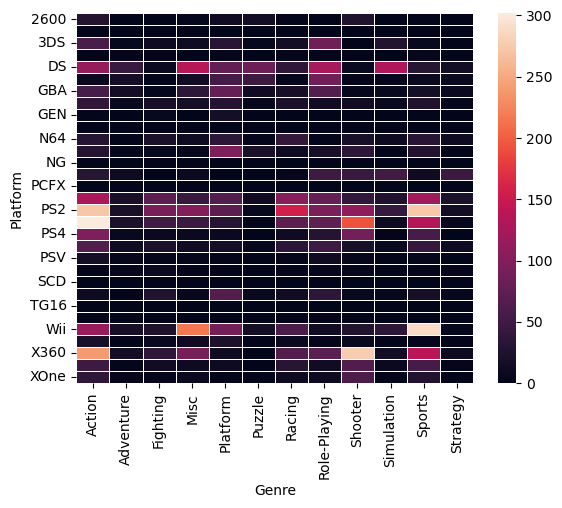

In [46]:
sns.heatmap(platform_genre_sales, annot=False, linewidths= 0.5)